# Load all packages
## Used to

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import sys
print(sys.version)
!python --version

3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]
Python 3.12.9


In [3]:
!pip install -r requirements.txt
# !pip install -r /content/drive/MyDrive/Dissertation/requirements.txt

# All imports

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, Activation, Add
from tensorflow.keras.optimizers import Adam
from scipy.special import gamma
import scipy.signal as signal
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import precision_score

# Load the data and make a dummy visualisation
## 1 column is bid 3 one is ask
### Bid < ASK

### TODO
Liste:

1.   Features fonctionnent et sont plausibles
2.   Creer fonction automatique qui produit des Features   
3.   Creer M.A.R.S.
4.   Assurer que LSTM fonctionne


# TODO add mathematical functions correctly
The *Gamma function* satisfying $\Gamma(n) = (n-1)!\quad\forall n\in\mathbb N$ is via the Euler integral

$$
\Gamma(z) = \int_0^\infty t^{z-1}e^{-t}dt\,.
$$

c:\Users\achapell\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:4008: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\achapell\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(7794,)
(7796,)
(7795,)
(7794,) (7794,) (7794,) (7794,) (7794,) (7794,) (7794,)
(7794,) (7794,) ()
   mid_prices    spread       OFI       OBI  Market_depth      AMPD  \
0   -0.236167 -0.937317 -0.000202  1.306131     -0.780402 -0.299546   
1   -0.236167 -0.937317 -0.000202  1.306131     -0.780402 -0.299546   
2   -0.236167 -0.937317 -0.000202  1.306131     -0.780402 -0.299546   
3   -0.236167 -0.937317 -0.000202  1.306131     -0.780402 -0.299546   
4   -0.236167 -0.937317 -0.000202  1.306131     -0.780402 -0.299546   

   cancelation_rate        BV  ema_mid_prices            JV  
0         -6.064924 -2.394566        -0.23833 -1.355253e-20  
1         -6.064924 -2.394566        -0.23833 -1.355253e-20  
2         -6.064924 -2.394566        -0.23833 -1.355253e-20  
3         -6.064924 -2.394566        -0.23833 -1.355253e-20  
4         -6.064924 -2.394566        -0.23833 -1.355253e-20  


c:\Users\achapell\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\achapell\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


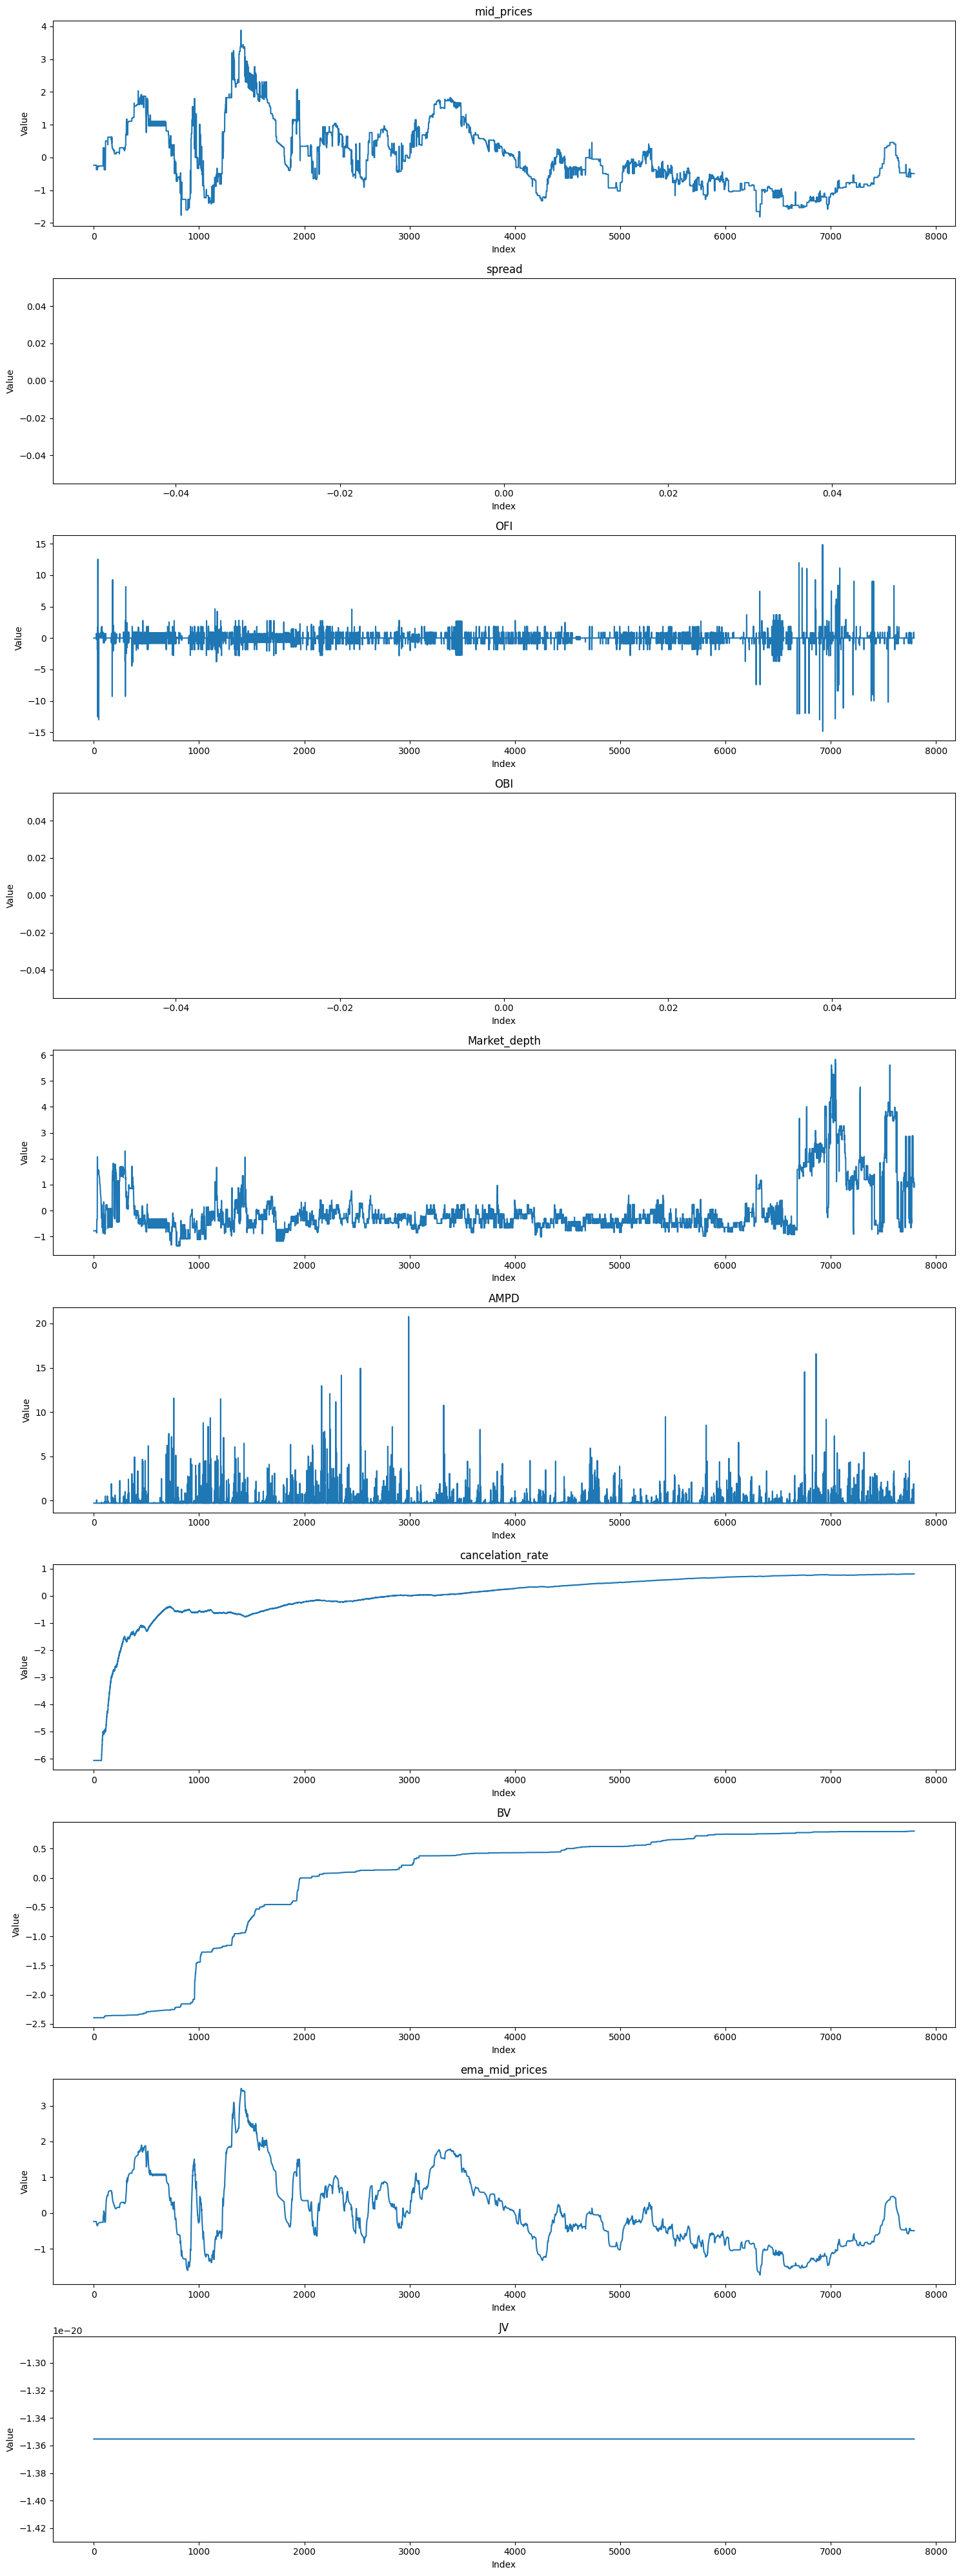

Correlation Matrix:
                  mid_prices    spread       OFI       OBI  Market_depth  \
mid_prices          1.000000  0.157882 -0.006532  0.046633     -0.160122   
spread              0.157882  1.000000 -0.001311  0.194032     -0.322861   
OFI                -0.006532 -0.001311  1.000000 -0.190919     -0.023019   
OBI                 0.046633  0.194032 -0.190919  1.000000     -0.006881   
Market_depth       -0.160122 -0.322861 -0.023019 -0.006881      1.000000   
AMPD               -0.002947 -0.029300  0.002183 -0.002846      0.032976   
cancelation_rate   -0.364147 -0.137045 -0.000285 -0.051902      0.131945   
BV                 -0.408539 -0.253439 -0.000183 -0.026355      0.185946   
ema_mid_prices      0.993129  0.176698  0.000094  0.044942     -0.164990   
JV                       NaN       NaN       NaN       NaN           NaN   

                      AMPD  cancelation_rate        BV  ema_mid_prices  JV  
mid_prices       -0.002947         -0.364147 -0.408539        0.99

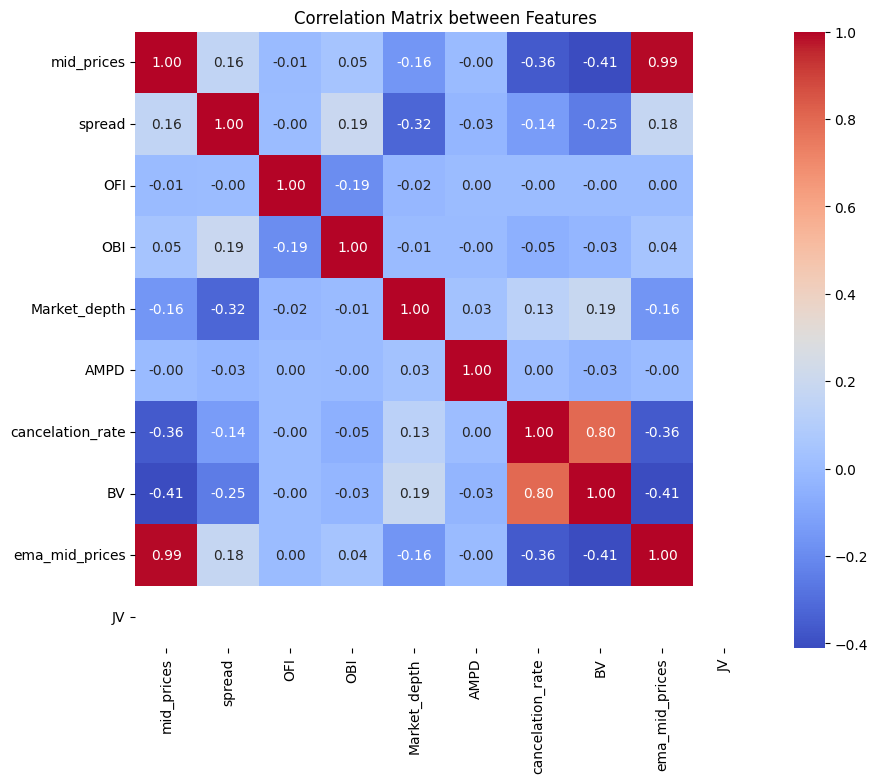

Variance Inflation Factor (VIF) for each feature:
            feature           VIF
0        mid_prices  7.532804e+01
1            spread  1.274595e+00
2               OFI  1.042246e+00
3               OBI  1.092355e+00
4      Market_depth  1.143524e+00
5              AMPD  1.007043e+00
6  cancelation_rate  2.816907e+00
7                BV  3.058994e+00
8    ema_mid_prices  7.563253e+01
9                JV  1.342296e+06
Fold 1 silhouette score: 0.192
Fold 2 silhouette score: 0.185
Fold 3 silhouette score: 0.194
Fold 4 silhouette score: 0.194
Fold 5 silhouette score: 0.197
Average silhouette score across folds: 0.193


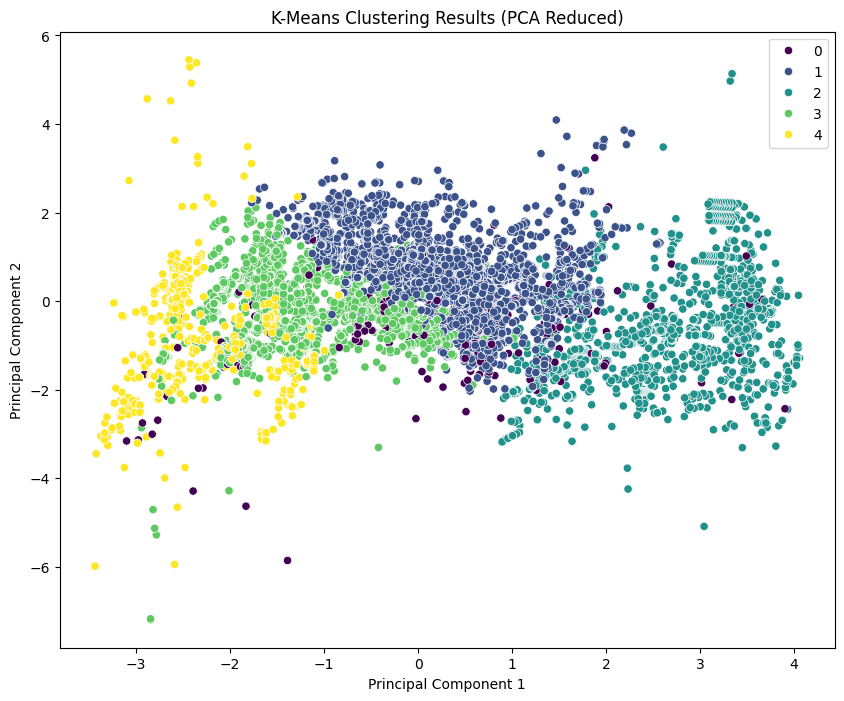

In [5]:
try:
    data = pd.read_csv('data/AMZN_2012-06-21_34200000_57600000_orderbook_5.csv')
    message_data = pd.read_csv('data/AMZN_2012-06-21_34200000_57600000_message_5.csv')
    # data = pd.read_csv('/content/drive/MyDrive/Dissertation/data/AMZN_2012-06-21_34200000_57600000_orderbook_5.csv')
    # message_data = pd.read_csv('/content/drive/MyDrive/Dissertation/data/AMZN_2012-06-21_34200000_57600000_message_5.csv')
    VALUE_PERCENTAGE = 0.05

    # Extract the first 5% of the data
    data_sample = data.iloc[:int(len(data) * VALUE_PERCENTAGE)]
    message_sample = message_data.iloc[:int(len(message_data) * VALUE_PERCENTAGE)]
    data = data_sample
    message_data = message_sample

    #print(data.head())


except Exception as e:
    print(f"An error occurred: {e}")

# Preprocessing
tick_size = 0.0001

#####################################################################################
#                            Feature Engineering Functions                          #
#####################################################################################

# Define the features
def get_mid_price(data, index_1 = 0, index_2 = 2):
    return (data[:, index_1] + data[:, index_2])/2

def get_spread(data, index_1 = 0, index_2 = 2):
    return data[:, index_1] - data[:, index_2]

def get_returns_mid_price(mid_price, use_log_returns):
    if use_log_returns:
        return np.diff(np.log(mid_price))

    return np.diff(mid_price)

def get_realized_variance(returns, use_log_returns=True):

    # Calculate the realised variance as the sum of squared returns
    rv = np.empty(returns.size+1)
    rv[0] = np.nan
    rv[1:] = np.cumsum(returns ** 2)
    return rv

def get_BOOK_imbalance(data_matrix, index_1 = 1, index_2 = 3):
    ask_volumes = data_matrix[:, index_1]
    bid_volumes = data_matrix[:, index_2]
    weighted_imbalance = (ask_volumes - bid_volumes) / (ask_volumes + bid_volumes)
    return weighted_imbalance

def get_FLOW_imbalance(data_matrix, index_1=1, index_2=3):
    bid_volumes = data_matrix[:, index_2]
    ask_volumes = data_matrix[:, index_1]

    # Get the previous bid and ask volumes
    bid_volumes_prev = np.roll(bid_volumes, 1)
    ask_volumes_prev = np.roll(ask_volumes, 1)

    # Calculate the imbalance
    imbalance = (bid_volumes - bid_volumes_prev) - (ask_volumes - ask_volumes_prev)
    return imbalance

# Realised Kernel Calculation
def get_parzen_kernel(x):
    """Parzen kernel function for noise-robust QV estimation."""
    abs_x = np.abs(x)
    if abs_x <= 0.5:
        return 1 - 6 * (abs_x ** 2) + 6 * (abs_x ** 3)
    elif abs_x <= 1:
        return 2 * ((1 - abs_x) ** 3)
    return 0  # Zero outside the range

def get_autocovariation(X, h):
    """Compute autocovariation at lag h."""
    if h == 0:
        return np.var(X, ddof=1)  # Variance at lag 0
    return np.mean((X[:-h] - np.mean(X)) * (X[h:] - np.mean(X)))  # Covariance at lag h

def get_realised_kernel(X, H=10):
    """
    Compute the cumulative Realized Kernel for a given time series X with bandwidth H.
    For each time index t, the RK is computed using data X[0:t+1].

    Parameters:
        X (array-like): Time series data (e.g., asset returns or price increments).
        H (int): Kernel bandwidth.

    Returns:
        numpy.ndarray: Array RK where RK[t] is the Realized Kernel computed using X[0:t+1].
    """
    N = len(X)
    RK = np.zeros(N)

    for t in range(N):
        # Compute the lag-0 autocovariation using data up to time t.
        gamma_0 = get_autocovariation(X[:t+1], 0)
        kernel_sum = 0.0

        # For each lag h, ensure we have enough observations (i.e., t >= h)
        for h in range(1, min(H, t) + 1):
            # Weight for the h-th lag from the Parzen kernel function.
            weight = get_parzen_kernel(h / H)
            # Compute the autocovariations at lag h and -h using data up to t.
            gamma_h = get_autocovariation(X[:t+1], h)
            gamma_minus_h = get_autocovariation(X[:t+1], -h)
            kernel_sum += weight * (gamma_h + gamma_minus_h)

        # The cumulative realized kernel at time t.
        RK[t] = gamma_0 + kernel_sum

    return RK


def get_cancellation_ratio(message_matrix, column_index=1):
    # Create a boolean array for orders that are either execution (2) or cancellation (3)
    is_exec_or_cancel = (message_matrix[:, column_index] == 2) | (message_matrix[:, column_index] == 3)

    # Convert the boolean array to integers (True becomes 1, False becomes 0)
    is_exec_or_cancel = is_exec_or_cancel.astype(int)

    # Compute the cumulative count of execution + cancellation orders
    cumulative_counts = np.cumsum(is_exec_or_cancel)

    # Create an array for the total orders up to each index (1-indexed)
    total_orders = np.arange(1, len(message_matrix) + 1)

    # Compute the cumulative ratio for each order
    cumulative_ratio = cumulative_counts / total_orders

    return cumulative_ratio

def get_preaveraged_realized_variance(prices, returns, delta_n, theta=1):
    """
    Compute the pre-averaged realized variance (PA-RV) for a given price series.

    The estimator is defined as:

        PA-RVₜ = (√(Δₙ)/(θ ψ₂)) ∑ᵢ₌₀ⁿ⁻ᴴ⁺¹ (X̄ⁿᵢ)²
                 - (ψ₁ Δₙ/(2θ² ψ₂)) ∑ᵢ₌₀ⁿ (r(X)ᵢ)²,

    where:
      • Δₙ is the time increment between observations,
      • n = len(prices) - 1 (the number of returns),
      • H = ⌊θ √n⌋ is the pre-averaging window length,
      • r(X)ᵢ are the returns computed as differences of log prices,
      • The pre-averaged increment is computed as
            X̄ⁿᵢ = ∑ⱼ₌₁ᴴ⁻¹ g(j/H) (log(prices)₍ᵢ₊ⱼ₎ - log(prices)₍ᵢ₊ⱼ₋₁₎),
      • For g(x) = min(x, 1−x), we have ψ₁ = ∫₀¹ (g′(s))² ds = 1 and
        ψ₂ = ∫₀¹ (g(s))² ds = 1/12.

    Parameters:
        prices (array-like): Series of prices.
        delta_n (float): The time interval Δₙ between observations.
        theta (float): Pre-averaging horizon parameter (default is 1).

    Returns:
        float: The pre-averaged realized variance estimate.
    """

    n = len(prices)
    # Determine pre-averaging window size H (must be at least 2)
    H = int(np.floor(theta * np.sqrt(n)))
    if H < 2:
        raise ValueError("Insufficient data points for pre-averaging (H must be at least 2).")

    # Define the pre-averaging function g(x) = min(x, 1-x) for x in [0,1]
    def g(x):
        return min(x, 1 - x)

    # Compute the sum of squared pre-averaged increments
    preavg_squared_sum = 0.0
    # The index i runs from 0 to n - H + 1 (inclusive)
    for i in range(n - H + 2):
        preavg = 0.0
        for j in range(1, H):
            preavg += g(j / H) * returns[i + j - 1]
        preavg_squared_sum += preavg ** 2

    # Set psi values for g(x) = min(x, 1-x)
    psi1 = 1.0
    psi2 = 1.0 / 12.0

    # Sum of squared returns (the realized variance component)
    sum_squared_returns = np.sum(returns ** 2)

    # Compute the pre-averaged realized variance (PA-RV)
    PA_RV = (np.sqrt(delta_n) / (theta * psi2)) * preavg_squared_sum - \
            (psi1 * delta_n / (2 * theta**2 * psi2)) * sum_squared_returns

    return PA_RV

def get_bipower_variation(r):

    # Compute the product of consecutive absolute returns:
    # For i=1,...,len(r)-1, prod[i-1] = |r[i]| * |r[i-1]|

    prod = np.abs(r[1:]) * np.abs(r[:-1])
    cum_prod = np.cumsum(prod)

    # Allocate an array for BV with the same length as prices
    BV = np.full(r.shape, np.nan)
    # For t >= 2 (i.e. price index 2 corresponds to the first full pair), assign:
    return np.array((np.pi / 2) * cum_prod)


def get_rolling_std(returns, window = 10):

    n = len(returns)
    rolling_std = np.full(n, np.nan)

    # For each time t where we have a full window, compute the rolling standard deviation.
    for t in range(0, n):
        if n-t-window == 0:
            window -= 1
        window_returns = returns[t:t + window]
        mean_return = np.mean(window_returns)
        # Note: Using 1/N as in the provided formula (i.e. the population standard deviation).
        rolling_std[t] = np.sqrt(np.mean((window_returns - mean_return) ** 2))

    return rolling_std

def get_noise_variance_MP (returns):
    n = len(returns)
    prod = r[1:] * r[:-1]
    return(-1/(n-1) * np.cumsum(prod))

def get_noise_variance_returns (returns):
    n = len(returns)
    return(1/(2*n) * np.cumsum(returns**2))

def get_RQ(returns):
    return(len(returns)/3 *cumsum(returns**4))

def get_RQT(returns):

    n = len(returns)
    if n < 3:
        raise ValueError("Return series must contain at least 3 observations.")

    # Compute μ₄/₃ = 2^(2/3) * Γ(7/6) / sqrt(pi)
    mu_4_3 = 2**(2/3) * gamma(7/6) / np.sqrt(np.pi)

    # Compute |r|^(4/3) for each return
    r_power = np.abs(returns) ** (4/3)

    # For i = 3, ..., n (1-indexed), the product term is:
    # |r_i|^(4/3) * |r_{i-1}|^(4/3) * |r_{i-2}|^(4/3)
    # In Python (0-indexed), sum over indices i = 2 to n-1:
    product_terms = r_power[2:] * r_power[1:-1] * r_power[:-2]

    sum_product = np.sum(product_terms)

    RQ_t = n * (mu_4_3 ** -3) * sum_product
    return RQ_t

    # TODO fix
    #return(len(returns)/3 *cumsum(returns**4))

#####################################################################################
#                                Standard Functions                                 #
#####################################################################################

def normalise(mid_prices, method="log_return"):
    """
    Normalise mid-prices using different methods:

    - "log_return": Computes log-returns to stabilise variance.
    - "min_max": Scales mid-prices between [0,1] using MinMaxScaler.
    - "standard": Standardises mid-prices using mean 0, variance 1.

    Parameters:
        mid_prices (numpy array or list): Raw mid-price series.
        method (str): "log_return", "min_max", or "standard".

    Returns:
        numpy array: Normalised mid-prices.
    """

    if method == "log_return":
        return np.diff(np.log(mid_prices))  # Log-returns

    elif method == "min_max":
        scaler = MinMaxScaler(feature_range=(0, 1))
        return scaler.fit_transform(mid_prices.reshape(-1, 1)).flatten()

    elif method == "standard":
      if np.std(mid_prices) == 0:
            raise ValueError("Standard deviation is zero! The data might be constant.")
      else:
        return (mid_prices - np.mean(mid_prices)) / np.std(mid_prices)

    else:
        raise ValueError("Invalid method! Choose from 'log_return', 'min_max', or 'standard'.")

def get_ema(prices, period = 10):
    """
    Compute the Exponential Moving Average (EMA) for a given price series.

    The EMA is defined recursively as:
        EMA_t = alpha * P_t + (1 - alpha) * EMA_{t-1},
    with the smoothing factor:
        alpha = 2 / (period + 1)

    Parameters:
        prices (array-like): 1D array of prices (e.g., mid-prices).
        period (int): The number of periods over which to compute the EMA.
                      For high-frequency data, a small period is often used.

    Returns:
        numpy.ndarray: The EMA time series, of the same length as prices.
    """
    n = len(prices)
    if n == 0:
        return np.array([])

    alpha = 2 / (period + 1)
    ema = np.empty(n)
    ema[0] = prices[0]  # Initialize with the first price

    for t in range(1, n):
        ema[t] = alpha * prices[t] + (1 - alpha) * ema[t - 1]

    return ema
#####################################################################################
#                                Feature Building                                   #
#####################################################################################

def get_features(fdata, message_data):
    # create a matrix of the data
    data_matrix = fdata.to_numpy()
    message_matrix = message_data.to_numpy()

    #data_matrix = data_matrix[1:, :]

    # Calculate the mid price
    mid_prices = get_mid_price(data_matrix)
    normalised_mid_price = normalise(mid_prices, "standard")

    # Calculate bid ask spread
    spread = get_spread(data_matrix)[1:]

    # Calculate normalised bid ask spread
    spread_normalised = (spread / tick_size)

    # Get returns for the midprice assumed log return
    mid_price_returns = get_returns_mid_price(mid_prices, True)

    #Realised Variance
    realised_variance = get_realized_variance(mid_price_returns)

    # Calculate the the order flow imbalance

    OFI = get_FLOW_imbalance(data_matrix)[1:]

    # Calculate the the order flow imbalance
    OBI = get_BOOK_imbalance(data_matrix)[1:]

    # Calculate Market Depth
    Market_depth = np.sum(data_matrix[:, 1:10:2], axis=1)[1:]

    # Calculate the financial duration
    times = message_matrix[:, 0]
    financial_duration = np.diff(times)

    # Average mid price financial duration
    AMPD = financial_duration * mid_prices[1:]

    # Cancelation rate calculation
    cancelation_rate = get_cancellation_ratio(message_matrix)[1:]

    # Calculate the realized kernel
    realised_kernel_mid_prices = get_realised_kernel(mid_prices)[1:]

    # Calculate preaveraged realized variance
    #get_preaveraged_realized_variance(mid_price_returns, realised_variance, 1)

    # Calculate the exponential moving average
    ema_mid_prices = get_ema(mid_prices, 10)

    # Calculate Bipower Variance
    BV = get_bipower_variation(mid_price_returns)
    print(BV.shape)

    # Calculate Jump Variation
    JV = np.max(realised_variance[2:] - BV, 0)

    print(realised_variance.shape)
    # Calculate Rolling Standard D  eviation
    R_std_dev = get_rolling_std(mid_price_returns, 0)

    print(R_std_dev.shape)
    # Print the length of the features
    print(mid_prices[2:].shape, spread[1:].shape, OFI[1:].shape, OBI[1:].shape, Market_depth[1:].shape, AMPD[1:].shape, cancelation_rate[1:].shape)
    print(ema_mid_prices[2:].shape, BV.shape, JV.shape)
    # Ensure all arrays have the same length
    min_length = min(len(mid_prices[2:]), len(spread[1:]), len(OFI[1:]), len(OBI[1:]), len(Market_depth[1:]), len(AMPD[1:]), len(cancelation_rate[1:]), len(BV), len(ema_mid_prices[2:]))

    return {
        'mid_prices': np.array(mid_prices[2:2+min_length]),
        'spread': np.array(spread[1:1+min_length]),
        #'spread_normalised': np.array(spread_normalised[:min_length]),
        'OFI': np.array(OFI[1:1+min_length]),
        'OBI': np.array(OBI[1:1+min_length]),
        'Market_depth': np.array(Market_depth[1:1+min_length]),
        #'financial_duration': np.array(financial_duration[:min_length]),
        'AMPD': np.array(AMPD[1:1+min_length]),
        # TODO Need to transform into log to read better
        'cancelation_rate': np.array(cancelation_rate[1:1+min_length]),
        #'realised_kernel_mid_prices': np.array(realised_kernel_mid_prices[:min_length]),
        'BV': np.array(BV[:min_length]),
        #'R_std_dev': np.array(R_std_dev[:min_length]),
        'ema_mid_prices': ema_mid_prices[2:2+min_length],
        'JV': JV
    }

features = get_features(data, message_data)
features_df = pd.DataFrame(features)
scaler = StandardScaler()
features_normalized = {key: scaler.fit_transform(np.array(features_df[key]).reshape(-1, 1)).flatten() for key in features_df.columns}
# Create a dataframe of the features
features_normalized_df = pd.DataFrame(features_normalized)
print(features_normalized_df.head())

# Get a list of the feature names from the normalised DataFrame
feature_names = features_df.columns.tolist()
num_features = len(feature_names)

# Define the grid layout for the subplots: here we use 3 columns
ncols = 1
nrows = (num_features + ncols - 1) // ncols  # This calculates the required number of rows

# Create the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 4))
axes = axes.flatten()  # Flatten the grid for easy iteration

# Plot each feature in its own subplot
for i, feature in enumerate(feature_names):
    if feature in ['spread', 'OBI']:
        axes[i].plot(features_normalized_df[feature][10000:10500]/10000)
    else:
        axes[i].plot(features_normalized_df[feature])

    axes[i].set_title(feature)
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Value')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Compute the correlation matrix between features
corr_matrix = features_df.corr()
print("Correlation Matrix:")
print(corr_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Features')
plt.show()


# Create a DataFrame of features to test for multicollinearity.
# Here we use features_df, which contains the raw features.
X = features_df.copy()

# Add a constant (intercept) term to the model
X = sm.add_constant(X)

# Compute the VIF for each feature
# Remove the too much correlated features
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data)

# --------- K-Means Clustering with K-Fold Cross Validation ---------

# Use the normalised features for clustering
# TODO define the best number of clusters
n_clusters = 5  # Set desired number of clusters
kf = KFold(n_splits=5, shuffle=True, random_state=42)
silhouette_scores = []
fold = 1

for train_index, test_index in kf.split(features_normalized_df):
    X_train = features_normalized_df.iloc[train_index]
    X_test = features_normalized_df.iloc[test_index]

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train)
    test_labels = kmeans.predict(X_test)

    if len(np.unique(test_labels)) > 1:
        score = silhouette_score(X_test, test_labels)
        silhouette_scores.append(score)
        print(f"Fold {fold} silhouette score: {score:.3f}")
    else:
        print(f"Fold {fold} resulted in a single cluster; silhouette score cannot be computed.")
    fold += 1

if silhouette_scores:
    avg_silhouette = np.mean(silhouette_scores)
    print(f"Average silhouette score across folds: {avg_silhouette:.3f}")
else:
    print("No valid silhouette scores were computed.")

# --------- Clustering on Entire Dataset and Visualisation ---------

# Fit K-Means on the entire normalised dataset
kmeans_full = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans_full.fit_predict(features_normalized_df)

# If you have ground truth labels, you can compute precision.
# For example, assuming you have a NumPy array 'true_labels' of the same length:
#
# from sklearn.metrics import precision_score
# precision = precision_score(true_labels, clusters, average='macro')
# print(f"Clustering precision: {precision:.3f}")
#
# In unsupervised clustering, ground truth labels are typically unavailable.

# Use PCA to reduce the normalised features to 2 dimensions for plotting
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features_normalized_df)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette='viridis', legend='full')
plt.title("K-Means Clustering Results (PCA Reduced)")
# TODO define what's principal component 1 and 2
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## Prepare the data for the loop
> The train test val data must be the same for all the models

In [6]:
def prepare_data_for_kfold(features, features_normalized, window_size=10, random_state=42):
    # Build a DataFrame from the normalized features.
    df_norm = pd.DataFrame(features_normalized)

    # For the input features, remove the mid–prices (target values).
    input_feature_names = [col for col in df_norm.columns if col != 'mid_prices']
    X_all = df_norm[input_feature_names].values  # shape: (n_samples, n_features)

    # Get the raw mid–prices from the original features.
    mid_prices_raw = features['mid_prices']  # NumPy array

    # Create sequences using a sliding window.
    X_seq = []     # Sequences: shape (WINDOW_SIZE, n_features)
    y_class = []   # Classification labels.
    y_reg = []     # Regression labels (number of events until price change).

    for i in range(len(X_all) - window_size - 1):
        seq = X_all[i : i + window_size]
        current_price = mid_prices_raw[i + window_size - 1]
        next_price = mid_prices_raw[i + window_size]  # immediate next event

        # (a) Classification Label
        if next_price > current_price:
            direction = 1   # up
        elif next_price < current_price:
            direction = -1  # down
        else:
            direction = 0   # unchanged

        # Map to class indices:
        #    -1 (down) --> 0, 0 (unchanged) --> 1, +1 (up) --> 2
        if direction == -1:
            cls_label = 0
        elif direction == 0:
            cls_label = 1
        else:
            cls_label = 2

        # (b) Regression Label: Count how many events until price changes.
        count = 1  # start counting with the immediate next event.
        j = i + window_size
        while j < len(mid_prices_raw) and mid_prices_raw[j] == current_price:
            count += 1
            j += 1

        X_seq.append(seq)
        y_class.append(cls_label)
        y_reg.append(count)

    # Convert lists to NumPy arrays.
    X_seq = np.array(X_seq)         # shape: (num_samples, window_size, n_features)
    y_class = np.array(y_class)       # shape: (num_samples,)
    y_reg = np.array(y_reg, dtype=np.float32)  # shape: (num_samples,)

    print("X_seq shape:", X_seq.shape)
    print("y_class shape:", y_class.shape)
    print("y_reg shape:", y_reg.shape)

    # Split into Train (70%) and Temporary (30%) sets.
    X_train, X_temp, y_class_train, y_class_temp, y_reg_train, y_reg_temp = train_test_split(
        X_seq, y_class, y_reg, test_size=0.3, random_state=random_state
    )

    # Split the temporary set into Test (20% overall) and Validation (10% overall).
    # Since X_temp is 30% of total, we use test_size=0.3333 to yield 10% for validation.
    X_test, X_val, y_class_test, y_class_val, y_reg_test, y_reg_val = train_test_split(
        X_temp, y_class_temp, y_reg_temp, test_size=0.3333, random_state=random_state
    )

    # Combine classification and regression labels.
    Y_train = np.column_stack((y_class_train, y_reg_train))
    Y_test = np.column_stack((y_class_test, y_reg_test))
    Y_val = np.column_stack((y_class_val, y_reg_val))

    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("X_val shape:", X_val.shape)
    print("Y_train shape:", Y_train.shape)
    print("Y_test shape:", Y_test.shape)
    print("Y_val shape:", Y_val.shape)

    return X_train, X_test, X_val, Y_train, Y_test, Y_val


## Linear Regression
> Add paper

In [7]:
def run_linear_regression(X_train, X_test, X_val, Y_train, Y_test, Y_val, path):
    # Flatten the 3D sequence data into 2D arrays for linear regression
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat  = X_test.reshape(X_test.shape[0], -1)
    X_val_flat   = X_val.reshape(X_val.shape[0], -1)
    
    # Extract the regression labels from the combined Y arrays.
    # We assume the regression labels are in the second column (index 1).
    y_reg_train = Y_train[:, 1]
    y_reg_test  = Y_test[:, 1]
    y_reg_val   = Y_val[:, 1]

    # Initialize and train the Linear Regression model on the training set
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_flat, y_reg_train)

    # Predict on training, validation, and test sets
    y_reg_train_pred = lin_reg.predict(X_train_flat)
    y_reg_test_pred  = lin_reg.predict(X_test_flat)
    y_reg_val_pred   = lin_reg.predict(X_val_flat)

    # Compute evaluation metrics
    mse_train = mean_squared_error(y_reg_train, y_reg_train_pred)
    r2_train  = r2_score(y_reg_train, y_reg_train_pred)
    
    mse_test  = mean_squared_error(y_reg_test, y_reg_test_pred)
    r2_test   = r2_score(y_reg_test, y_reg_test_pred)
    
    mse_val   = mean_squared_error(y_reg_val, y_reg_val_pred)
    r2_val    = r2_score(y_reg_val, y_reg_val_pred)

    # Compute RMSE
    rmse_train = np.sqrt(mse_train)
    rmse_test  = np.sqrt(mse_test)
    rmse_val   = np.sqrt(mse_val)

    # Print evaluation metrics
    print("Linear Regression Model Evaluation:")
    print("Train -> Mean Squared Error: {:.4f}, R-squared: {:.4f}, RMSE: {:.4f}".format(mse_train, r2_train, rmse_train))
    print("Validation -> Mean Squared Error: {:.4f}, R-squared: {:.4f}, RMSE: {:.4f}".format(mse_val, r2_val, rmse_val))
    print("Test -> Mean Squared Error: {:.4f}, R-squared: {:.4f}, RMSE: {:.4f}".format(mse_test, r2_test, rmse_test))

    # Plot Actual vs Predicted for Validation Set
    plt.figure(figsize=(10, 5))
    plt.plot(y_reg_val, label='Validation Actual', linestyle='dashed')
    plt.plot(y_reg_val_pred, label='Validation Predicted', linestyle='solid')
    plt.xlabel('Sample Index')
    plt.ylabel('Regression Value')
    plt.title('Validation: Actual vs Predicted Regression Values')
    plt.legend()
    plt.savefig(os.path.join(path, 'linear_regression_validation.png'))
    ##plt.show()
    plt.close()

    # Plot Actual vs Predicted for Test Set
    plt.figure(figsize=(10, 5))
    plt.plot(y_reg_test, label='Test Actual', linestyle='dashed')
    plt.plot(y_reg_test_pred, label='Test Predicted', linestyle='solid')
    plt.xlabel('Sample Index')
    plt.ylabel('Regression Value')
    plt.title('Test: Actual vs Predicted Regression Values')
    plt.legend()
    plt.savefig(os.path.join(path, 'linear_regression_test.png'))
    ##plt.show()
    plt.close()

    return {'rmse':rmse_val}

## RandomForest
> Add paper

In [8]:
def run_rf_regression(X_train, X_test, X_val, Y_train, Y_test, Y_val, path):
    # Flatten the 3D sequence data into 2D arrays for RandomForest
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat  = X_test.reshape(X_test.shape[0], -1)
    X_val_flat   = X_val.reshape(X_val.shape[0], -1)
    
    # Extract the regression labels from the combined Y arrays.
    # Assumes the regression label is stored in the second column.
    y_reg_train = Y_train[:, 1]
    y_reg_test  = Y_test[:, 1]
    y_reg_val   = Y_val[:, 1]

    # Initialize and train the Random Forest Regressor on the training set
    rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_reg.fit(X_train_flat, y_reg_train)

    # Predict on training, validation, and test sets
    y_reg_train_pred = rf_reg.predict(X_train_flat)
    y_reg_val_pred   = rf_reg.predict(X_val_flat)
    y_reg_test_pred  = rf_reg.predict(X_test_flat)

    # Compute evaluation metrics for each split
    mse_train = mean_squared_error(y_reg_train, y_reg_train_pred)
    r2_train  = r2_score(y_reg_train, y_reg_train_pred)
    
    mse_val = mean_squared_error(y_reg_val, y_reg_val_pred)
    r2_val  = r2_score(y_reg_val, y_reg_val_pred)
    
    mse_test = mean_squared_error(y_reg_test, y_reg_test_pred)
    r2_test  = r2_score(y_reg_test, y_reg_test_pred)

    # Print evaluation metrics
    print("Random Forest Regression Model Evaluation:")
    print("Train -> Mean Squared Error: {:.4f}, R-squared: {:.4f}".format(mse_train, r2_train))
    print("Validation -> Mean Squared Error: {:.4f}, R-squared: {:.4f}".format(mse_val, r2_val))
    print("Test -> Mean Squared Error: {:.4f}, R-squared: {:.4f}".format(mse_test, r2_test))

    # Plot Actual vs Predicted for the Validation set
    plt.figure(figsize=(10, 5))
    plt.plot(y_reg_val, label='Validation Actual', linestyle='dashed')
    plt.plot(y_reg_val_pred, label='Validation Predicted', linestyle='solid')
    plt.xlabel('Sample Index')
    plt.ylabel('Regression Value')
    plt.title('Validation: Actual vs Predicted Regression Values (Random Forest)')
    plt.legend()
    plt.savefig(os.path.join(path, 'rf_regression_validation.png'))
    plt.close()

    # Plot Actual vs Predicted for the Test set
    plt.figure(figsize=(10, 5))
    plt.plot(y_reg_test, label='Test Actual', linestyle='dashed')
    plt.plot(y_reg_test_pred, label='Test Predicted', linestyle='solid')
    plt.xlabel('Sample Index')
    plt.ylabel('Regression Value')
    plt.title('Test: Actual vs Predicted Regression Values (Random Forest)')
    plt.legend()
    plt.savefig(os.path.join(path, 'rf_regression_test.png'))
    plt.close()
    
    #TODO not good returned value
    return {'rmse':mse_val}


## K_clustering

In [9]:
#TODO check parameters
def run_k_clustering(X_train, X_val, X_test, path, n_clusters=3, random_state=42, plot_clusters=True):
    # Helper function: flatten data only if necessary.
    def flatten_data(X):
        return X.reshape(X.shape[0], -1) if X.ndim > 2 else X

    X_train_flat = flatten_data(X_train)
    X_val_flat   = flatten_data(X_val)
    X_test_flat  = flatten_data(X_test)

    # Fit KMeans on the training data.
    model = KMeans(n_clusters=n_clusters, random_state=random_state)
    model.fit(X_train_flat)

    # Predict cluster labels.
    train_labels = model.predict(X_train_flat)
    val_labels   = model.predict(X_val_flat)
    test_labels  = model.predict(X_test_flat)

    # Compute evaluation metrics.
    train_inertia = model.inertia_
    silhouette_train = silhouette_score(X_train_flat, train_labels) if len(np.unique(train_labels)) > 1 else None
    silhouette_val   = silhouette_score(X_val_flat, val_labels) if len(np.unique(val_labels)) > 1 else None
    silhouette_test  = silhouette_score(X_test_flat, test_labels) if len(np.unique(test_labels)) > 1 else None

    print("K-Means Clustering Evaluation:")
    print(f"Train Inertia: {train_inertia:.4f}")
    print(f"Train Silhouette Score: {silhouette_train:.4f}" if silhouette_train is not None else "Train Silhouette Score: N/A")
    print(f"Validation Silhouette Score: {silhouette_val:.4f}" if silhouette_val is not None else "Validation Silhouette Score: N/A")
    print(f"Test Silhouette Score: {silhouette_test:.4f}" if silhouette_test is not None else "Test Silhouette Score: N/A")

    # Plot clusters if the flattened data is 2D.
    if plot_clusters and X_train_flat.shape[1] == 2:
        fig, axes = plt.subplots(1, 3, figsize=(15, 4))
        axes[0].scatter(X_train_flat[:, 0], X_train_flat[:, 1], c=train_labels, cmap='viridis', s=50)
        axes[0].set_title("Train Clusters")
        axes[0].set_xlabel("Feature 1")
        axes[0].set_ylabel("Feature 2")
        
        axes[1].scatter(X_val_flat[:, 0], X_val_flat[:, 1], c=val_labels, cmap='viridis', s=50)
        axes[1].set_title("Validation Clusters")
        axes[1].set_xlabel("Feature 1")
        axes[1].set_ylabel("Feature 2")
        
        axes[2].scatter(X_test_flat[:, 0], X_test_flat[:, 1], c=test_labels, cmap='viridis', s=50)
        axes[2].set_title("Test Clusters")
        axes[2].set_xlabel("Feature 1")
        axes[2].set_ylabel("Feature 2")
        
        plt.tight_layout()
        plt.savefig(os.path.join(path, 'kmeans_clusters.png'))
        ## plt.show()
        plt.close()

    # Compute RMSE for validation set
    rmse_val = np.sqrt(mean_squared_error(X_val_flat, model.cluster_centers_[val_labels]))

    return {'rmse':rmse_val}


## LSTM

> WINDOW SIZE = 10 because used in paper

TODO: Add NADAM: [Link article](https://ieeexplore.ieee.org/document/8743410)

In [10]:
# Custom RMSE metric for regression.
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

def run_lstm(X_train, X_test, X_val, Y_train, Y_test, Y_val, path, epochs=20, batch_size=64):
    # Split the combined labels into classification and regression targets.
    y_class_train, y_reg_train = Y_train[:, 0], Y_train[:, 1]
    y_class_val,   y_reg_val   = Y_val[:, 0],   Y_val[:, 1]
    y_class_test,  y_reg_test  = Y_test[:, 0],  Y_test[:, 1]

    # Determine input dimensions.
    n_timesteps = X_train.shape[1]   # equals WINDOW_SIZE
    n_features  = X_train.shape[2]    # number of features

    # =============================================================================
    # 1. Build the Multi-Task LSTM Model
    # =============================================================================
    input_layer = Input(shape=(n_timesteps, n_features))
    
    # LSTM layers with dropout.
    lstm_out = LSTM(256, return_sequences=True)(input_layer)
    drop = Dropout(0.2)(lstm_out)
    lstm_out2 = LSTM(128, return_sequences=False)(drop)
    drop2 = Dropout(0.2)(lstm_out2)
    
    # Shared dense layer.
    shared_dense = Dense(128, activation='tanh')(drop2)

    # Classification head: apply the Dense layer on shared_dense.
    cls_output = Dense(3, activation='softmax', name='classification')(shared_dense)
    
    # Regression head: apply the Dense layer on shared_dense.
    reg_output = Dense(1, activation='linear', name='regression')(shared_dense)

    # Define the model with two outputs.
    model = Model(inputs=input_layer, outputs=[cls_output, reg_output])
    model.summary()

    # =============================================================================
    # 2. Compile the Model
    # =============================================================================
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss={
            'classification': 'sparse_categorical_crossentropy',
            'regression': 'mse'
        },
        metrics={
            'classification': 'accuracy',
            'regression': rmse  # Root Mean Squared Error
        }
    )

    # =============================================================================
    # 3. Train the Model (using test set for monitoring)
    # =============================================================================
    history = model.fit(
        X_train,
        {'classification': y_class_train, 'regression': y_reg_train},
        validation_data=(X_test, {'classification': y_class_test, 'regression': y_reg_test}),
        epochs=epochs,
        batch_size=batch_size
    )

    # =============================================================================
    # 4. Evaluate the Model on the Validation Set
    # =============================================================================
    results = model.evaluate(X_val, {'classification': y_class_val, 'regression': y_reg_val})
    print("\nValidation loss and metrics:")
    print(results)

    # Calculate RMSE on validation set.
    val_predictions = model.predict(X_val)
    val_rmse = rmse(y_reg_val, val_predictions[1])
    print("\nValidation RMSE:")
    print(val_rmse.numpy())

    # =============================================================================
    # 5. Plot the Training History
    # =============================================================================
    # Create the folder if it doesn't exist.
    if not os.path.exists(path):
        os.makedirs(path)

    plt.figure(figsize=(12, 5))
    
    # Plot classification accuracy.
    plt.subplot(1, 2, 1)
    plt.plot(history.history.get('classification_accuracy', []), label='Train Accuracy')
    plt.plot(history.history.get('val_classification_accuracy', []), label='Val Accuracy')
    plt.title('Classification Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(os.path.join(path, 'classification_accuracy.png'))
    
    # Plot regression RMSE.
    plt.subplot(1, 2, 2)
    plt.plot(history.history.get('regression_rmse', []), label='Train RMSE')
    plt.plot(history.history.get('val_regression_rmse', []), label='Val RMSE')
    plt.title('Regression RMSE')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.legend()
    plt.savefig(os.path.join(path, 'regression_rmse.png'))
    
    plt.tight_layout()
    # plt.show()  # Uncomment if you want to display the plots interactively.

    return {'rmse': val_rmse.numpy()}


## ResNet

In [11]:
# Define a simple ResNet block
def resnet_block(x, units):
    shortcut = x  # Residual connection

    x = Dense(units)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Dense(units)(x)
    x = BatchNormalization()(x)

    # Add residual connection
    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model
def build_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    
    x = Dense(128, activation='relu')(inputs)
    x = resnet_block(x, 128)
    x = resnet_block(x, 128)

    x = Dense(64, activation='relu')(x)
    # Use 'linear' activation if regression (num_classes == 1), else 'softmax'
    activation = 'linear' if num_classes == 1 else 'softmax'
    outputs = Dense(num_classes, activation=activation)(x)

    model = Model(inputs, outputs)
    return model

# TODO check parameters
def run_resnet(X_train, Y_train, X_test, Y_test, X_val, Y_val, path, epochs=20, batch_size=32):
    # Flatten the 3D sequence data into 2D arrays for ResNet
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat  = X_test.reshape(X_test.shape[0], -1)
    X_val_flat   = X_val.reshape(X_val.shape[0], -1)
    
    # Extract the regression labels from the combined Y arrays.
    y_reg_train = Y_train[:, 1]
    y_reg_test  = Y_test[:, 1]
    y_reg_val   = Y_val[:, 1]

    # Determine the input shape.
    input_shape = (X_train_flat.shape[1],)  # Number of features
    num_classes = 1  # Regression task

    # Build and compile the model.
    model = build_resnet(input_shape, num_classes)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])
    model.summary()

    # Train the model using the training set and validation set.
    history = model.fit(
        X_train_flat, y_reg_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test_flat, y_reg_test)
    )

    # Evaluate the model on the validation set.
    results = model.evaluate(X_val_flat, y_reg_val)
    print("\nValidation loss and metrics:")
    print(results)

    # Calculate RMSE on validation set
    val_predictions = model.predict(X_val_flat)
    val_rmse = np.sqrt(mean_squared_error(y_reg_val, val_predictions))
    print("\nValidation RMSE:")
    print(val_rmse)

    # Plot the training history.
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.title('ResNet Training Loss')
    plt.legend()
    plt.savefig(os.path.join(path, 'resnet_training_loss.png'))
    ## plt.show()
    plt.close()

    return {'rmse': val_rmse}

## ARIMA
> ARIMAX can be used if we had data of better quality

In [12]:
# TODO check parameters
def run_arimax(X_train, Y_train, X_test, Y_test, X_val, Y_val, path, order=(2, 1, 2)):  
    # Extract the regression labels from the combined Y arrays.
    y_reg_train = Y_train[:, 1]
    y_reg_val = Y_val[:, 1]
    y_reg_test = Y_test[:, 1]

    # Convert to pandas Series for ARIMA
    train_y = pd.Series(y_reg_train)
    val_y = pd.Series(y_reg_val)
    test_y = pd.Series(y_reg_test)

    # Convert the input features to pandas DataFrame
    train_X = pd.DataFrame(X_train.reshape(X_train.shape[0], -1))
    val_X = pd.DataFrame(X_val.reshape(X_val.shape[0], -1))
    test_X = pd.DataFrame(X_test.reshape(X_test.shape[0], -1))

    # ---------------------------
    # Fit ARIMAX on training data
    # ---------------------------
    print("Fitting ARIMAX model on training data...")
    model_train = ARIMA(train_y, exog=train_X, order=order)
    model_train_fit = model_train.fit()
    
    # Forecast on the validation period.
    val_steps = len(val_y)
    val_forecast = model_train_fit.forecast(steps=val_steps, exog=val_X)
    
    # Compute RMSE for validation set.
    rmse_val = np.sqrt(mean_squared_error(val_y, val_forecast))
    print("ARIMAX Validation RMSE:", rmse_val)
    
    # Plot Actual vs. Predicted for Validation.
    plt.figure(figsize=(10, 5))
    plt.plot(val_y.index, val_y, label='Actual Validation', linestyle='dashed')
    plt.plot(val_y.index, val_forecast, label='Predicted Validation', linestyle='solid')
    plt.xlabel('Time Index')
    plt.ylabel('Target')
    plt.title('Validation: Actual vs Predicted (ARIMAX)')
    plt.legend()
    plt.savefig(os.path.join(path, 'arimax_validation.png'))
    ## plt.show()
    plt.close()

    return {'rmse':rmse_val}


## M.A.R.S. Model
### Reference article
This model has been presented by blablabla 
> [Stock Price Prediction Using Time Series, Econometric, Machine Learning, and Deep Learning Models](https://arxiv.org/pdf/2111.01137)

### Model's structure
Briefly explain the structure of the model

$$
\hat{y} = \beta_0 + \sum_{m=1}^{M} \beta_m B_m(\mathbf{x})
$$

$$
B_m(x) = \max(0, x - c) \quad \text{or} \quad \max(0, c - x)
$$

$$
B_m(\mathbf{x}) = \max(0, x_i - c) \times \max(0, x_j - d)
$$

$$
\hat{y} = 2.5 + 1.2 \max(0, x_1 - 3.0) - 0.8 \max(0, 2.5 - x_2) + 1.5 \max(0, x_1 - 4.2) \max(0, x_2 - 1.8)
$$


In [13]:
# # Use already prepared train-test sets
# X_train_flat = X_train.reshape(X_train.shape[0], -1)
# X_test_flat = X_test.reshape(X_test.shape[0], -1)

# # Fit MARS model
# mars = Earth()
# mars.fit(X_train_flat, y_reg_train)

# # Forecast with exogenous variables
# y_reg_pred = mars.predict(X_test_flat)

# # Evaluate performance
# mse = mean_squared_error(y_reg_test, y_reg_pred)

# # Print results
# print("MARS Model Evaluation:")
# print("Mean Squared Error:", mse)

# # Plot actual vs predicted values
# plt.figure(figsize=(10, 5))
# plt.plot(y_reg_test, label='Actual', linestyle='dashed')
# plt.plot(y_reg_pred, label='Predicted', linestyle='solid')
# plt.xlabel('Sample Index')
# plt.ylabel('Regression Value')
# plt.title('Actual vs Predicted Regression Values (MARS)')
# plt.legend()
# plt.show()

## Loop
Loop over different parameters
<p>Define the required parameters...<p>

Error: Access is denied

=== Fold 1 ===
X_seq shape: (7783, 10, 9)
y_class shape: (7783,)
y_reg shape: (7783,)
X_train shape: (5448, 10, 9)
X_test shape: (1556, 10, 9)
X_val shape: (779, 10, 9)
Y_train shape: (5448, 2)
Y_test shape: (1556, 2)
Y_val shape: (779, 2)
Linear Regression Model Evaluation:
Train -> Mean Squared Error: 89.3961, R-squared: 0.0867, RMSE: 9.4550
Validation -> Mean Squared Error: 95.7081, R-squared: 0.0589, RMSE: 9.7830
Test -> Mean Squared Error: 90.3080, R-squared: 0.0700, RMSE: 9.5031
Random Forest Regression Model Evaluation:
Train -> Mean Squared Error: 3.1999, R-squared: 0.9673
Validation -> Mean Squared Error: 20.8877, R-squared: 0.7946
Test -> Mean Squared Error: 21.4155, R-squared: 0.7795
K-Means Clustering Evaluation:
Train Inertia: 301416.0240
Train Silhouette Score: 0.2659
Validation Silhouette Score: 0.2559
Test Silhouette Score: 0.2629


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 10, 9)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 10, 256)   │    272,384 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 10, 256)   │          0 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 128)       │    197,120 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 128)       │     16,512 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classification      │ (None, 3)         │        387 │ dense_8[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ regression (Dense)  │ (None, 1)         │        129 │ dense_8[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 486,532 (1.86 MB)

 Trainable params: 486,532 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - classification_accuracy: 0.6414 - classification_loss: 0.8674 - loss: 111.0840 - regression_loss: 110.2106 - regression_rmse: 10.8085 - val_classification_accuracy: 0.7410 - val_classification_loss: 0.7646 - val_loss: 90.1879 - val_regression_loss: 93.2824 - val_regression_rmse: 10.7569
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - classification_accuracy: 0.7458 - classification_loss: 0.7361 - loss: 87.8985 - regression_loss: 87.1484 - regression_rmse: 10.4406 - val_classification_accuracy: 0.7423 - val_classification_loss: 0.7346 - val_loss: 80.1805 - val_regression_loss: 84.0155 - val_regression_rmse: 10.3087
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - classification_accuracy: 0.7543 - classification_loss: 0.7142 - loss: 81.3850 - regression_loss: 80.6552 - regression_rmse: 10.2068 - val_classification_accuracy: 0.7423 - val_classification_loss: 0.7299 - val_loss: 80.0868 - val_regression_loss: 84.0718 - val_regres

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 90)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 128)       │     11,648 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 128)       │     16,512 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_10[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 128)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 128)       │     16,512 │ activation_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_11[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 128)       │          0 │ batch_normalizat… │
│                     │                   │            │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 128)       │          0 │ add_2[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 128)       │     16,512 │ activation_5[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_12[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 128)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 128)       │     16,512 │ activation_6[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_13[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 128)       │          0 │ batch_normalizat… │
│                     │                   │            │ activation_5[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 128)       │          0 │ add_3[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 64)        │      8,256 │ activation_7[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 1)         │         65 │ dense_14[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 88,065 (344.00 KB)

 Trainable params: 87,041 (340.00 KB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 92.2672 - mse: 92.2672 - val_loss: 82.5779 - val_mse: 82.5779
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83.7281 - mse: 83.7281 - val_loss: 70.1913 - val_mse: 70.1913
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 69.0096 - mse: 69.0096 - val_loss: 68.9620 - val_mse: 68.9620
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 59.7742 - mse: 59.7742 - val_loss: 66.9054 - val_mse: 66.9054
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 59.2876 - mse: 59.2876 - val_loss: 64.9133 - val_mse: 64.9133
Epoch 6/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 53.3258 - mse: 53.3258 - val_loss: 63.2997 - val_mse: 63.2997
Epoch 7/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 51.8262 - mse: 51.8262 - val_loss: 61.1363 - val_mse: 61.1363
Epoch 8/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 48.4445 - mse: 48.4445 - val_loss: 66.3123 - val_mse: 66.3123
Epoch 9/20
171/171 ━━━━━

c:\Users\achapell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX Validation RMSE: 9.809091632459463

All results saved to 'model_results\model_kfold_results.csv'.


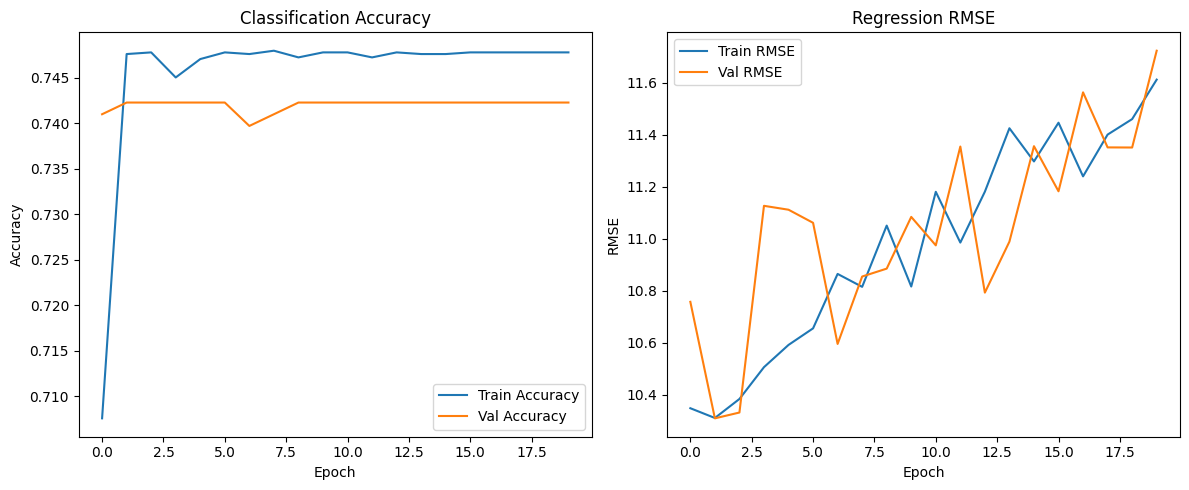

In [18]:
import shutil
import time

# Create a folder to save the data
save_folder = 'model_results'
## TODO delete this line used for testing
if os.path.exists(save_folder):
    try:
        shutil.rmtree(save_folder)
    except OSError as e:
        print(f"Error: {e.strerror}")
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

# K-Fold loop that calls the data preparation and each model.
n_folds = 1
all_results = []  # to store results from each model per fold

# For each fold, we call prepare_data_for_kfold with a different random state.
for fold in range(n_folds):
    print(f"\n=== Fold {fold + 1} ===")
    rs = 42 + fold  # vary random state to obtain different splits

    # Create a subfolder for the current fold
    fold_folder = os.path.join(save_folder, f'fold_{fold + 1}')
    if not os.path.exists(fold_folder):
        os.makedirs(fold_folder)

    X_train, X_test, X_val, Y_train, Y_test, Y_val = prepare_data_for_kfold(
        features, features_normalized, window_size=10, random_state=rs
    )
    
    # Call each model function and update its returned metrics with the fold and model info.
    metrics = run_linear_regression(X_train, X_test, X_val, Y_train, Y_test, Y_val, fold_folder)
    metrics.update({'fold': fold + 1, 'model': 'linear_regression'})
    all_results.append(metrics)

    metrics = run_rf_regression(X_train, X_test, X_val, Y_train, Y_test, Y_val, fold_folder)
    metrics.update({'fold': fold + 1, 'model': 'rf_regression'})
    all_results.append(metrics)
    
    metrics = run_k_clustering(X_train, X_val, X_test, fold_folder, n_clusters=3, random_state=42, plot_clusters=False)
    metrics.update({'fold': fold + 1, 'model': 'k_clustering'})
    all_results.append(metrics)
    
    metrics = run_lstm(X_train, X_test, X_val, Y_train, Y_test, Y_val, fold_folder)
    metrics.update({'fold': fold + 1, 'model': 'lstm'})
    all_results.append(metrics)
    
    metrics = run_resnet(X_train, Y_train, X_test, Y_test, X_val, Y_val, fold_folder, epochs=20, batch_size=32)
    metrics.update({'fold': fold + 1, 'model': 'resnet'})
    all_results.append(metrics)
    
    metrics = run_arimax(X_train, Y_train, X_test, Y_test, X_val, Y_val, fold_folder, order=(2, 1, 2))
    metrics.update({'fold': fold + 1, 'model': 'arimax'})
    all_results.append(metrics)

# Convert all results into a DataFrame and save to CSV.
results_df = pd.DataFrame(all_results)
results_df.to_csv(os.path.join(save_folder, 'model_kfold_results.csv'), index=False)
print(f"\nAll results saved to '{os.path.join(save_folder, 'model_kfold_results.csv')}'.")


Summary statistics (average RMSE and standard deviation):
               model       mean  std
0             arimax   9.809092  NaN
1       k_clustering   0.788986  NaN
2  linear_regression   9.783049  NaN
3               lstm  12.021220  NaN
4             resnet   7.520371  NaN
5      rf_regression  20.887741  NaN


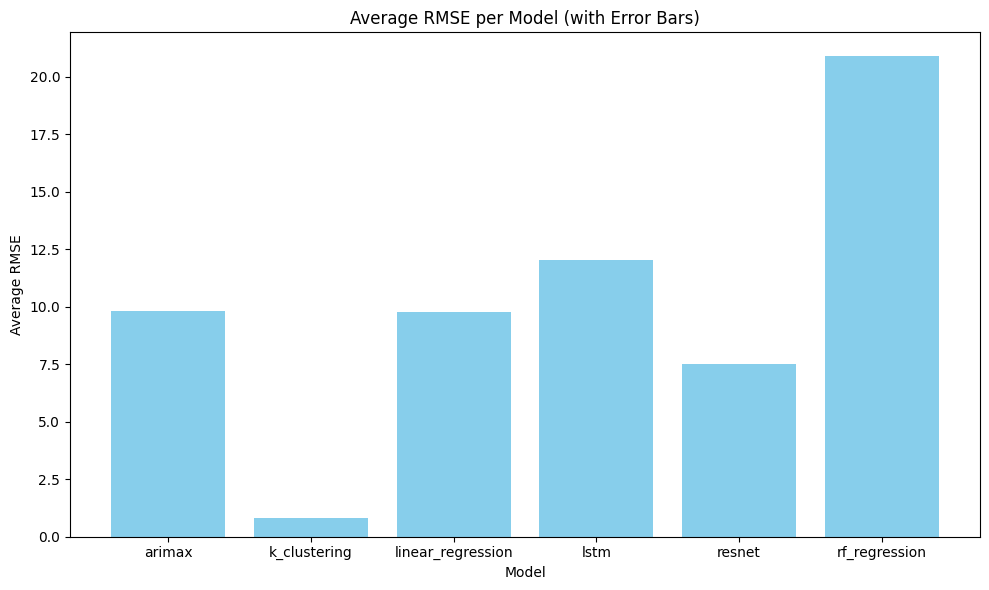

<Figure size 1000x600 with 0 Axes>

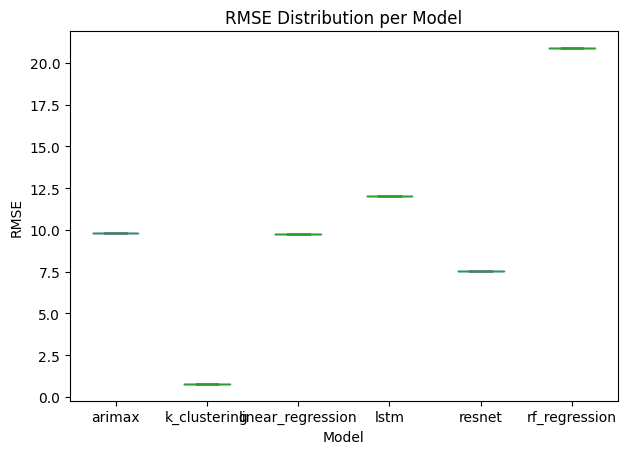


Best model: k_clustering with average RMSE of 0.7890 (std=nan)


In [19]:
results_df = pd.read_csv('model_results/model_kfold_results.csv')
results_df.head()

summary = results_df.groupby('model')['rmse'].agg(['mean', 'std']).reset_index()
print("\nSummary statistics (average RMSE and standard deviation):")
print(summary)

plt.figure(figsize=(10, 6))
plt.bar(summary['model'], summary['mean'], yerr=summary['std'], capsize=5, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Average RMSE')
plt.title('Average RMSE per Model (with Error Bars)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
results_df.boxplot(column='rmse', by='model', grid=False)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Distribution per Model')
plt.suptitle('') 
plt.tight_layout()
plt.show()

best_model = summary.loc[summary['mean'].idxmin()]
print(f"\nBest model: {best_model['model']} with average RMSE of {best_model['mean']:.4f} (std={best_model['std']:.4f})")


## Plotting

In [ ]:
# print(features.get("Order Imbalance"))
# plt.figure(figsize=(10, 6))
# plt.plot(features.get("Order Imbalance")[15050: 15100])
# plt.title('First level order imbalance evolution')
# plt.xlabel('Intrinsic time')
# plt.ylabel('Value in $')
# plt.grid(True)
# plt.show()

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.plot(features.get("Mid Price") /10000)
# plt.title('Mid-Price evolution')
# plt.xlabel('intrinsic time')
# plt.ylabel('Price in $')
# plt.grid(True)
# plt.show()

In [ ]:
# print(features.get("Spread Matrix"))
# plt.figure(figsize=(10, 6))
# plt.plot(features.get("Spread Matrix")[1000:1500]/10000)
# plt.title('Evolution of bid-ask spread')
# plt.ylabel('bid-ask spread in $')
# plt.xlabel('intrinsic time')
# plt.grid(True)
# plt.show()